<h1 style="background-color:rgba(203, 35, 23, 0.92); font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b>Obesity Risk Prediction</b>
</h1>

**Dataset Overview**

This notebook aims to analyze and predict obesity levels based on lifestyle, dietary habits, and personal characteristics.

**Key Features**  

- **id:** Unique identifier for each individual in the dataset.  
- **Gender:** Biological sex of the individual (Male/Female).  
- **Age:** Age of the person (years).  
- **Height:** Height of the individual (meters).  
- **Weight:** Weight of the individual (kilograms).  
- **family_history_with_overweight:** Indicates if obesity runs in the family (Yes/No).  
- **FAVC:** Frequent consumption of high-calorie food (Yes/No).  
- **FCVC:** Frequency of vegetable consumption (Scale: 1-3).  
- **NCP:** Number of main meals consumed daily.  
- **CAEC:** Frequency of food consumption between meals (Never/Sometimes/Frequently/Always).  
- **SMOKE:** Indicates if the person smokes (Yes/No).  
- **CH2O:** Daily water intake (liters).  
- **SCC:** Whether the person monitors their calorie intake (Yes/No).  
- **FAF:** Frequency of physical activity (Scale: 0-3).  
- **TUE:** Time spent using electronic devices daily (hours).  
- **CALC:** Alcohol consumption frequency (Never/Sometimes/Frequently/Always).  
- **MTRANS:** Mode of transportation (Public Transport/Walking/Automobile/Bike).  
- **NObeyesdad:** Target variable - obesity classification (Normal Weight, Overweight, Obese, etc.).  


# `01` Import Libraries

In [401]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/competitions/playground-series-s4e2/data)

In [402]:
train = pd.read_csv('../data/train.csv')    
test = pd.read_csv('../data/test.csv')  

In [403]:
df = train.copy()
print(df.shape)    
df.head()


(20758, 18)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


# `03` Simple Analysis & Exploratory Data Analysis (EDA) 

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [405]:
# There is No Null Values  
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [406]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [407]:
df.describe(include='object').T

,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


In [408]:
# There is No Duplicates
df.duplicated().sum()    

0

In [409]:
df.nunique()    

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

<b>This dataset appears to be imbalanced because the percentage distribution of the classes is not uniform. 
 Some categories, such as Obesity_Type_III (19.5%), have a significantly higher proportion compared to others, 
 like Overweight_Level_I (11.7%) and Overweight_Level_II (12.1%). <br> SO When making the model we will make the data balanced <b>

<Axes: ylabel='count'>

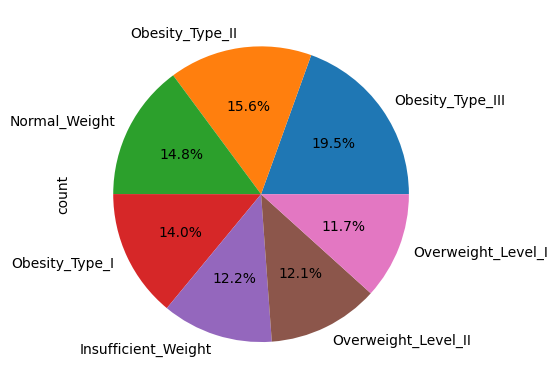

In [410]:
df["NObeyesdad"].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='count'>

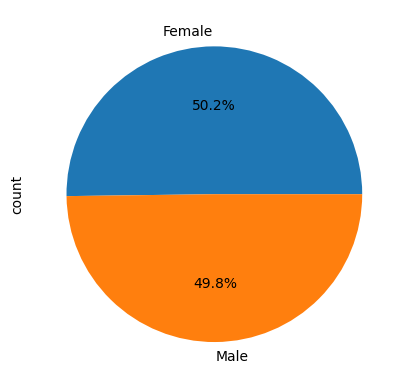

In [411]:
df["Gender"].value_counts().plot.pie(autopct='%1.1f%%')

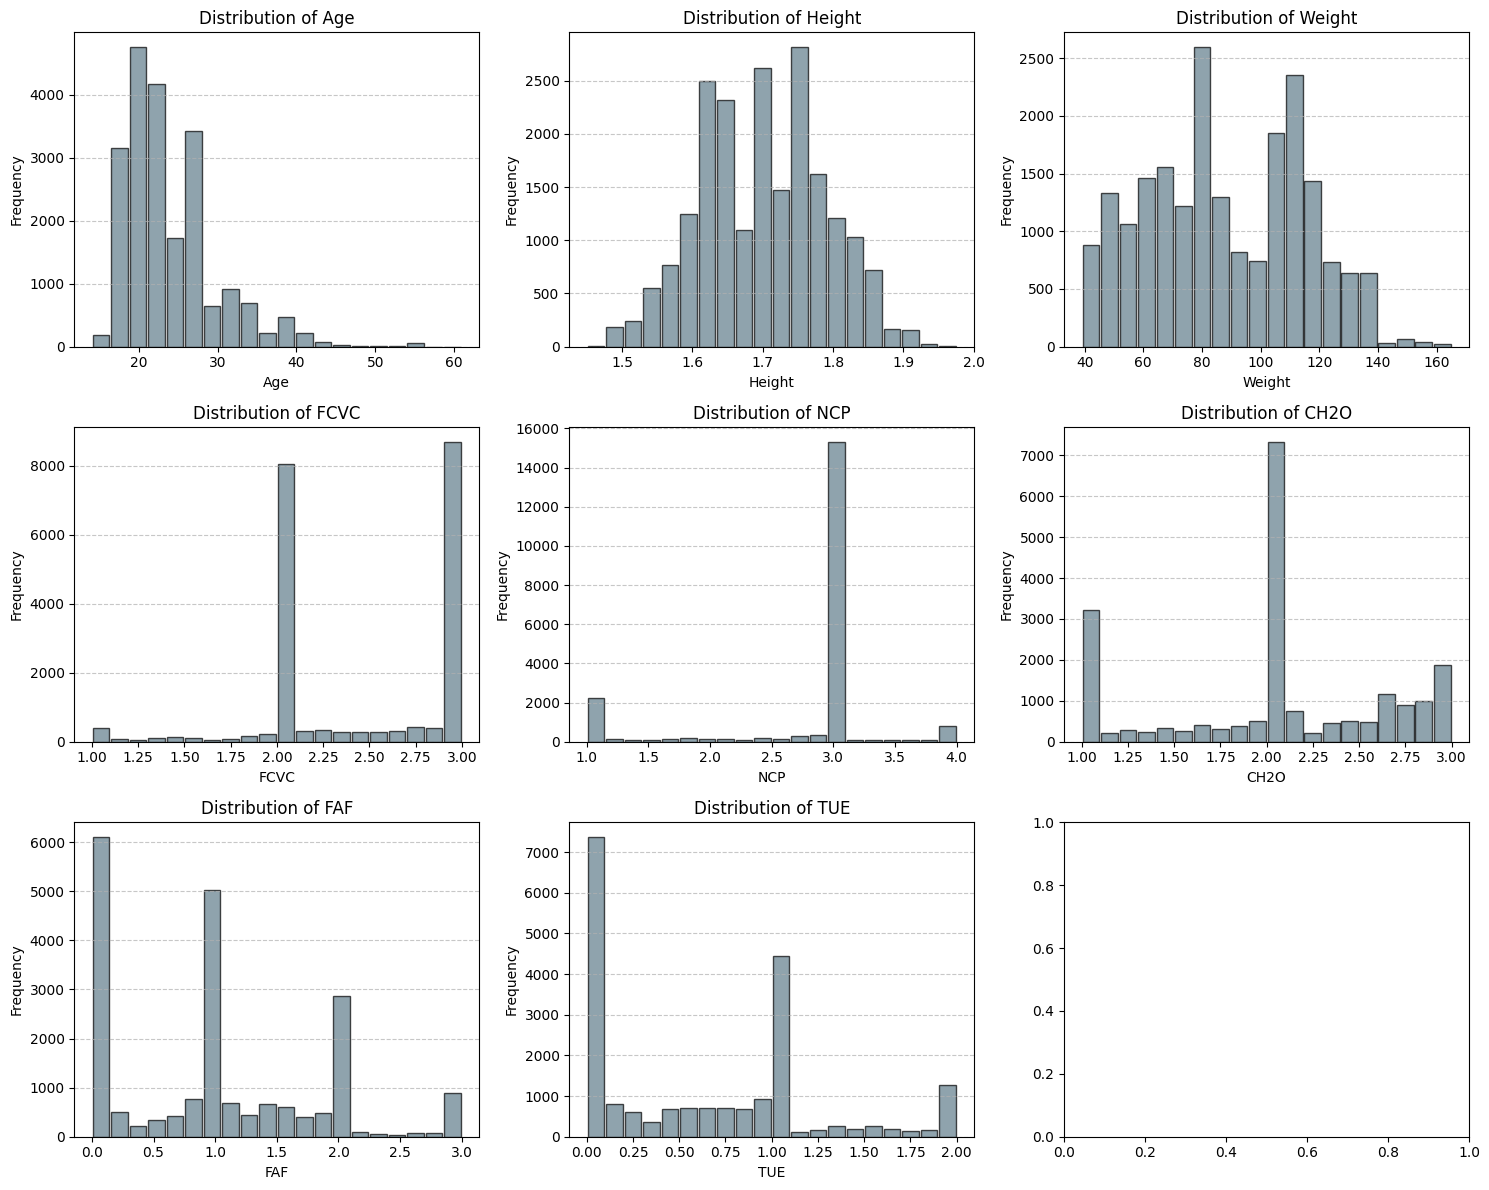

In [412]:
columns_hist = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3x3 grid layout

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(columns_hist):
    axes[i].hist(df[col], bins=20, color='#607D8B', edgecolor='black', alpha=0.7, rwidth=0.9)
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability

# Adjust layout for better spacing
plt.tight_layout()   # prevent overlapping labels and titles , making a clean and well-organized figure 
plt.show()


<b>We can See That <br>
1 - Obesity Type III is more prevalent in females.<br>
2 - Obesity Type II is more common in males.<br>
3 - Insufficient conditions appear more frequently in females.<br>
4 - Overweight and normal weight categories show a more balanced distribution between genders.<b>

In [413]:
px.histogram(df, x="NObeyesdad",color="Gender",barmode="group", height=500, width=1000, title="Distribution of Gender by NObeyesdad")

# `04` Data Preprocessing

In [414]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [415]:
df.drop('id', axis=1, inplace=True) 

In [416]:
x = df.drop('NObeyesdad', axis=1)   
y = df['NObeyesdad']

In [417]:
# train test split  
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=.15, random_state=42)

In [418]:
# now we will make an Encoding for Columns 
# 1 - Making a Label Encoding for Gender , family_history_with_overweight , FAVC , SMOKE , SCC
# Because it is Binary categorical, so Label Encoding is the simplest choice. 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder



label_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
label_encoders = {}    # Dictionary to store encoders for later use (e.g., inverse transform)

for col in label_columns:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    label_encoders[col] = le  # Store encoder for later use
    x_valid[col] = le.transform(x_valid[col])



# 2 - making ordinal Encoding for CAEC , CALC , NObeyesdad >>> because There is a natural order 
CAEc_Encoder = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always']])
x_train[['CAEC']] = CAEc_Encoder.fit_transform(x_train[['CAEC']])
x_valid[['CAEC']] = CAEc_Encoder.transform(x_valid[['CAEC']])

CALc_Encoder = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently']])
x_train[['CALC']] = CALc_Encoder.fit_transform(x_train[['CALC']])
x_valid[['CALC']] = CALc_Encoder.transform(x_valid[['CALC']])


NObeyesdad_Encoder = OrdinalEncoder(categories=[['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']])
y_train = NObeyesdad_Encoder.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_valid = NObeyesdad_Encoder.transform(y_valid.to_numpy().reshape(-1, 1))



# 3 - MTRANS >> one hot encoding >> because there is no natural order   
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
# Fit and transform on training data
encoded_train = onehot_encoder.fit_transform(x_train[['MTRANS']])
encoded_valid = onehot_encoder.transform(x_valid[['MTRANS']])
# Convert to DataFrame and add proper column names
encoded_train_df = pd.DataFrame(encoded_train, columns=onehot_encoder.get_feature_names_out(['MTRANS']))
encoded_valid_df = pd.DataFrame(encoded_valid, columns=onehot_encoder.get_feature_names_out(['MTRANS']))
# Reset index to match x_train and x_valid
encoded_train_df.index = x_train.index
encoded_valid_df.index = x_valid.index
# Drop the original column and concatenate the new encoded columns
x_train = x_train.drop(columns=['MTRANS']).join(encoded_train_df)
x_valid = x_valid.drop(columns=['MTRANS']).join(encoded_valid_df)


In [423]:
# i will apply StandardScaler to normalize the data on Age ,weight >> because it is Almost normally distributed 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[['Age', 'Weight']] = scaler.fit_transform(x_train[['Age', 'Weight']])
x_valid[['Age', 'Weight']] = scaler.transform(x_valid[['Age', 'Weight']])

In [424]:
x_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
11783,1,0.328252,1.829757,0.700252,1,1,2.722161,1.000000,1.0,0,2.000000,0,0.632164,0.000000,1.0,0.0,0.0,1.0,0.0
20623,0,0.108039,1.707508,1.262396,1,1,3.000000,3.000000,1.0,0,2.535629,0,0.973864,0.573958,1.0,0.0,0.0,1.0,0.0
20142,1,-0.502753,1.780000,0.760160,1,1,2.000000,1.000000,1.0,0,3.000000,0,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0
16000,1,0.719748,1.690000,-1.326653,1,0,2.000000,3.000000,2.0,0,2.000000,0,3.000000,1.000000,1.0,0.0,0.0,0.0,1.0
18490,1,-0.097560,1.793824,0.651341,1,1,2.000000,3.000000,1.0,0,2.000000,0,0.000000,0.138418,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,-1.026682,1.722461,-0.285418,1,1,2.628791,2.562895,1.0,0,1.844645,0,0.288032,0.722276,0.0,0.0,0.0,1.0,0.0
11964,1,-0.328110,1.750000,0.266914,1,0,3.000000,3.000000,1.0,0,2.000000,0,3.000000,0.000000,1.0,0.0,0.0,1.0,0.0
5390,1,-0.502753,1.620000,-0.757522,0,1,2.000000,3.000000,3.0,0,3.000000,0,2.000000,0.000000,1.0,0.0,0.0,1.0,0.0
860,0,0.370462,1.650125,0.909640,1,1,3.000000,3.000000,1.0,0,2.770732,0,0.000000,0.237307,1.0,0.0,0.0,1.0,0.0
